In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import log_loss, precision_score, recall_score
from sklearn.metrics import accuracy_score


In [2]:
raw_data = pd.read_csv('./data.csv')

In [3]:
raw_data.head()

,visitor,session,browser,sessions_before,sessions_with_affil_before,affil_after_p1_prev_session,sessions_before_with_checkout,sessions_before_with_cart,sessions_before_with_product,daily_sessions,...,entry_home,entry_product,page_depth,first_page_affil,coupon_run_on_checkout,coupon_run_on_cart,coupon_run_on_product,products_viewed,mal_cb,coupon_run
0,00006362-4996-4898-9aae-21317547d39e,8196a21e-e172-414a-bebe-231bfd8019ab,IE,0,0,0,0,0,0,0,...,1,0,14,0,0,0,0,5,0,0
1,00006362-4996-4898-9aae-21317547d39e,93660917-7a56-42f8-a59e-d06af115daad,IE,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,00006362-4996-4898-9aae-21317547d39e,8bf4bde4-6bf3-4fb8-ae03-0e52a9c41238,IE,2,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,0000879b-5642-476a-b307-da1736aa0e23,61398de4-3c0b-4630-b7e8-09610d19935b,IE,0,0,0,0,0,0,0,...,1,0,34,0,0,0,0,4,0,0
4,0000879b-5642-476a-b307-da1736aa0e23,62725745-7a89-46c7-a07d-4b745daffd69,IE,1,0,0,0,1,1,1,...,1,0,2,0,0,0,0,0,0,0


In [4]:
#raw_data.to_csv('./data.csv')

In [5]:
def coupon_run(x):
    x1 = bool(x)

In [6]:
def coupon_run(x,y,z):
    print(type(x))
    print(type(x==1))

In [7]:
tst_idx = raw_data[(raw_data['coupon_run_on_cart']==1)|(raw_data['coupon_run_on_checkout']==1)|(raw_data['coupon_run_on_product']==1)]

In [8]:
tst_idx['browser'].value_counts()

2           6245
5            826
3            702
Edge         518
IE           327
7              4
Vivaldi        1
Chromium       1
Name: browser, dtype: int64

In [9]:
len(raw_data)

775198

In [10]:
test_df = []

In [11]:
for i in range(len(raw_data)):
    if(i in tst_idx.index):
        test_df.append(1)
    else:
        test_df.append(0)

In [12]:
test_df_arr = np.array(test_df)

In [13]:
test_df_arr.shape

(775198,)

In [14]:
raw_data['coupon_run'] = test_df_arr

In [15]:
raw_data['coupon_run'].value_counts()

0    766574
1      8624
Name: coupon_run, dtype: int64

In [16]:
pd.options.display.max_columns = 1000

In [17]:
# anlysis on raw data
raw_data[raw_data['coupon_run']==1].describe()


,sessions_before,sessions_with_affil_before,affil_after_p1_prev_session,sessions_before_with_checkout,sessions_before_with_cart,sessions_before_with_product,daily_sessions,trialy_sessions,quintally_sessions,tenally_sessions,coupon_run_prev_ses_checkout_session,coupon_run_prev_ses_cart_session,coupon_run_prev_ses_product_session,time_spent,day_between_previous_session,daily_visitor,trialy_visitor,quintally_visitor,tenally_visitor,previous_session_cart,previous_session_checkout,previous_session_product,entry_home,entry_product,page_depth,first_page_affil,coupon_run_on_checkout,coupon_run_on_cart,coupon_run_on_product,products_viewed,mal_cb,coupon_run
count,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8.624000e+03,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.000000,8624.0
mean,2.625000,0.827226,1.321197,0.169991,0.800325,1.711155,0.527713,0.439471,0.306238,0.609810,0.008581,0.143785,0.164889,8.719834e+05,1.774003,0.357375,0.152597,0.065051,0.079661,0.214634,0.040816,0.483186,0.390770,0.249536,23.048237,0.122565,0.064355,0.455705,0.520524,4.520292,0.085111,1.0
std,4.400316,1.881524,3.990745,0.591877,1.798441,2.809039,0.929460,1.069888,0.983113,1.769312,0.093488,0.547808,0.525752,1.117128e+07,3.828949,0.479254,0.359620,0.246630,0.270784,0.410592,0.197876,0.499746,0.490322,0.432770,21.273613,0.327956,0.245399,0.498063,0.499608,5.976998,0.279063,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.220000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.827496e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.534490e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.0
75%,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.070520e+04,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,1.0
max,82.000000,64.000000,94.000000,10.000000,31.000000,35.000000,15.000000,24.000000,53.000000,58.000000,2.000000,11.000000,6.000000,6.648551e+08,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,238.000000,1.000000,1.000000,1.000000,1.000000,131.000000,1.000000,1.0


In [18]:
raw_data[raw_data['coupon_run']==0].describe()

,sessions_before,sessions_with_affil_before,affil_after_p1_prev_session,sessions_before_with_checkout,sessions_before_with_cart,sessions_before_with_product,daily_sessions,trialy_sessions,quintally_sessions,tenally_sessions,coupon_run_prev_ses_checkout_session,coupon_run_prev_ses_cart_session,coupon_run_prev_ses_product_session,time_spent,day_between_previous_session,daily_visitor,trialy_visitor,quintally_visitor,tenally_visitor,previous_session_cart,previous_session_checkout,previous_session_product,entry_home,entry_product,page_depth,first_page_affil,coupon_run_on_checkout,coupon_run_on_cart,coupon_run_on_product,products_viewed,mal_cb,coupon_run
count,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,7.665740e+05,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.000000,766574.0,766574.0,766574.0,766574.000000,766574.000000,766574.0
mean,3.335405,0.108277,0.149303,0.150522,0.571230,1.951174,0.616539,0.592003,0.384331,0.774454,0.001818,0.015278,0.014938,2.640935e+06,2.061759,0.345136,0.157099,0.069411,0.096734,0.124655,0.033750,0.456744,0.402159,0.169155,8.251514,0.012039,0.0,0.0,0.0,1.869135,0.035747,0.0
std,8.495479,0.731061,1.154949,0.995264,1.881794,5.239577,2.030250,2.732810,1.743419,2.245324,0.043273,0.166194,0.153295,8.056131e+07,4.142459,0.475413,0.363894,0.254153,0.295596,0.330327,0.180586,0.498126,0.491978,0.374889,13.348851,0.109061,0.0,0.0,0.0,7.787498,0.185660,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.347605e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.181565e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0
75%,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.802645e+04,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,10.000000,0.000000,0.0,0.0,0.0,2.000000,0.000000,0.0
max,292.000000,65.000000,117.000000,64.000000,81.000000,244.000000,47.000000,95.000000,95.000000,64.000000,2.000000,9.000000,7.000000,6.084348e+10,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,2303.000000,1.000000,0.0,0.0,0.0,2303.000000,1.000000,0.0


In [19]:
final_data = raw_data.drop(['visitor','session','browser','coupon_run_on_cart','coupon_run_on_checkout','coupon_run_on_product'],axis=1)

In [20]:
final_data.shape

(775198, 29)

## PCA visualization

In [43]:
# PCA visualization
sample_data = np.square(X)

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (28, 28)


In [44]:
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(26,27))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vecto

Shape of eigen vectors =  (28, 2)
Updated shape of eigen vectors =  (2, 28)


In [45]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 28) X (28, 775198)  =  (2, 775198)


In [46]:
import pandas as pd
labels=Y
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0       2.415294  -3.299780e+09    0.0
1      -6.853327  -1.631240e+08    0.0
2      -0.045876  -1.405647e+08    0.0
3      13.982148  -1.303875e+10    0.0
4      -0.098539  -2.421758e+08    0.0


C:\Users\JAYESH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


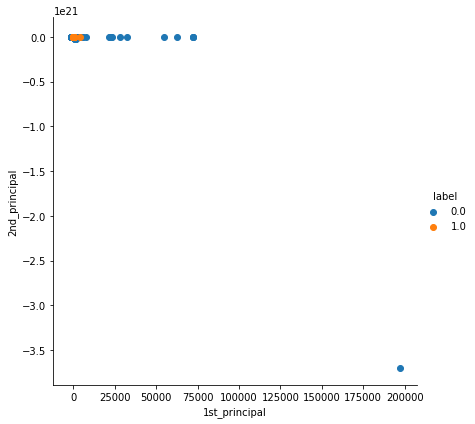

In [47]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [22]:
final_data.shape

(775198, 29)

In [21]:
X = final_data.iloc[:,:final_data.shape[1]-1]
Y = final_data.iloc[:,final_data.shape[1]-1]

In [22]:
processed_data = X

In [24]:
#train test split
int(0.8*len(final_data))


620158

In [32]:
train = final_data[:620157]
test = final_data[620157:]

In [ ]:
train['coupon_run'].value_counts()

In [ ]:
test['coupon_run'].value_counts()

In [ ]:
x_train = train.iloc[:,:train.shape[1]-1]
x_test = test.iloc[:,:test.shape[1]-1]

In [ ]:
y_train = train.iloc[:,train.shape[1]-1]
y_test = test.iloc[:,test.shape[1]-1]

In [135]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [136]:
X_test = scaler.transform(x_test)

In [73]:
optimal_lr = LogisticRegression(class_weight='balanced')
lp = optimal_lr.fit(X_train, y_train)


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
log_prd = optimal_lr.predict(X_test)

In [75]:
acc = accuracy_score(y_test, log_prd) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)


The accuracy of the Logistic Regression is {} 85.81342999593656


In [76]:
print("Classification Report")
print(classification_report(y_test,log_prd))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    153232
           1       0.06      0.73      0.11      1809

   micro avg       0.86      0.86      0.86    155041
   macro avg       0.53      0.80      0.52    155041
weighted avg       0.99      0.86      0.91    155041



In [70]:
xgb_model = xgb.XGBClassifier()

xgb_model = xgb_model.fit(X_train, y_train)


In [71]:
xgb_prd = xgb_model.predict(X_test)

In [72]:
acc = accuracy_score(y_test, xgb_prd) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test,xgb_prd))


The accuracy of the Logistic Regression is {} 98.84933662708573
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    153232
           1       0.70      0.02      0.05      1809

   micro avg       0.99      0.99      0.99    155041
   macro avg       0.84      0.51      0.52    155041
weighted avg       0.99      0.99      0.98    155041



In [81]:
Count_Normal_transacation = len(final_data[final_data["coupon_run"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(final_data[final_data["coupon_run"]==1])

In [91]:
len(final_data)

775198

In [95]:
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = final_data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.coupon_run==0])/len(undersample_data))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.coupon_run==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)

In [96]:
normal_indices = np.array(final_data[final_data.coupon_run==0].index)
abnormal_indices = np.array(final_data[final_data.coupon_run==1].index)

In [97]:
Undersample_data = undersample(normal_indices,abnormal_indices,1)

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 17248


In [104]:
X_undersample = Undersample_data.iloc[:,:Undersample_data.shape[1]-1]

Y_undersample = Undersample_data.iloc[:,Undersample_data.shape[1]-1]


In [118]:
X_undersample = np.array(X_undersample)
Y_undersample = np.array(Y_undersample)

In [140]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersample, Y_undersample, test_size=0.3, random_state=42)

In [141]:
optimal_lr_under = LogisticRegression(class_weight='balanced')
lp = optimal_lr_under.fit(X_train_under, y_train_under)

log_prd_undersmp = optimal_lr_under.predict(X_test_under)

acc = accuracy_score(y_test_under, log_prd_undersmp) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_under,log_prd_undersmp))


The accuracy of the Logistic Regression is {} 50.08695652173913
Classification Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2592
           1       0.00      0.00      0.00      2583

   micro avg       0.50      0.50      0.50      5175
   macro avg       0.25      0.50      0.33      5175
weighted avg       0.25      0.50      0.33      5175



C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
xgb_model_under = xgb.XGBClassifier()

xgb_model_under = xgb_model_under.fit(X_train_under, y_train_under)


xgb_prd_undersmpl = xgb_model_under.predict(X_test)

acc = accuracy_score(y_test, xgb_prd_undersmpl) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test,xgb_prd_undersmpl))


The accuracy of the Logistic Regression is {} 98.83321186008862
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    153232
           1       0.00      0.00      0.00      1809

   micro avg       0.99      0.99      0.99    155041
   macro avg       0.49      0.50      0.50    155041
weighted avg       0.98      0.99      0.98    155041



C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### using imblearn 

In [29]:
len(final_data[final_data['coupon_run']==1])/len(final_data)

0.01112489970304361

In [56]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(processed_data, Y, test_size=0.3, random_state=42)

In [57]:
X_train_imb.shape

(542638, 31)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train_imb,y_train_imb)

In [59]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scal = StandardScaler()
X_train_smote = scal.fit_transform(X_train_smote)
X_test_smote = scal.transform(X_test_smote)


In [143]:
x_test_imb = scal.transform(X_test_imb)

C:\Users\JAYESH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [144]:
from sklearn.naive_bayes import BernoulliNB
optimal_nb_sm = BernoulliNB(alpha=100)
lp = optimal_nb_sm.fit(X_train_smote, y_train_smote)


In [145]:

nb_prd_sm = optimal_nb_sm.predict(x_test_imb)

acc = accuracy_score(y_test_imb, nb_prd_sm) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_imb,nb_prd_sm))


The accuracy of the Logistic Regression is {} 64.81381148950808
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.65      0.78    229969
           1       0.02      0.66      0.04      2591

   micro avg       0.65      0.65      0.65    232560
   macro avg       0.51      0.65      0.41    232560
weighted avg       0.98      0.65      0.78    232560



True positive rate: 65.88189888074103
False positive rate: 35.19822236910192
True negative rate: 64.80177763089809
False negative rate: 34.118101119258974


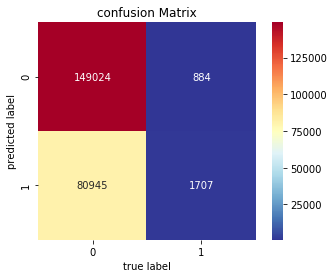

In [154]:
#y_test_np= np.asarray(y_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test_imb,nb_prd_sm)
tn, fp, fn, tp = confusion_matrix(y_test_imb,nb_prd_sm).ravel()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap='RdYlBu_r',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label');

print("True positive rate:",(tp/(tp+fn))*100)
print("False positive rate:",(fp/(tn+fp))*100)
print("True negative rate:",(tn/(tn+fp))*100)
print("False negative rate:",(fn/(tp+fn))*100)

In [146]:
optimal_lr_sm = LogisticRegression(C=100,class_weight='balanced')
lp = optimal_lr_sm.fit(X_train_smote, y_train_smote)


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:

log_prd_sm = optimal_lr_sm.predict(x_test_imb)

acc = accuracy_score(y_test_imb, log_prd_sm) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_imb,log_prd_sm))


The accuracy of the Logistic Regression is {} 95.70734434124527
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    229969
           1       0.02      0.07      0.03      2591

   micro avg       0.96      0.96      0.96    232560
   macro avg       0.51      0.52      0.51    232560
weighted avg       0.98      0.96      0.97    232560



True positive rate: 6.869934388267078
False positive rate: 3.2917480182111505
True negative rate: 96.70825198178885
False negative rate: 93.13006561173293


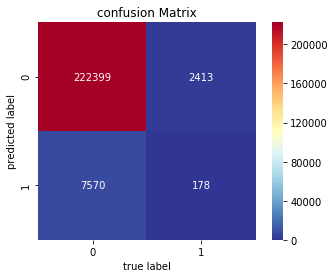

In [148]:
#y_test_np= np.asarray(y_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test_imb,log_prd_sm)
tn, fp, fn, tp = confusion_matrix(y_test_imb,log_prd_sm).ravel()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap='RdYlBu_r',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label');

print("True positive rate:",(tp/(tp+fn))*100)
print("False positive rate:",(fp/(tn+fp))*100)
print("True negative rate:",(tn/(tn+fp))*100)
print("False negative rate:",(fn/(tp+fn))*100)

In [149]:
xgb_model_sm = xgb.XGBClassifier()

xgb_model_sm = xgb_model_sm.fit(X_train_smote, y_train_smote)


In [150]:
x_test_df = np.array(x_test_imb)

In [151]:
x_test_df.shape

(232560, 31)

In [152]:
xgb_prd_smote = xgb_model_sm.predict(x_test_df)

In [153]:

acc = accuracy_score(y_test_imb, xgb_prd_smote) * 100
print('\nThe accuracy of the xgboost is {}' , acc)

print("Classification Report")
print(classification_report(y_test_imb,xgb_prd_smote))


The accuracy of the xgboost is {} 96.81759545923633
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    229969
           1       0.11      0.27      0.16      2591

   micro avg       0.97      0.97      0.97    232560
   macro avg       0.55      0.62      0.57    232560
weighted avg       0.98      0.97      0.97    232560



In [64]:
from sklearn.ensemble import RandomForestClassifier
opt_rf = RandomForestClassifier()
opt_rf = opt_rf.fit(X_train_smote,y_train_smote)


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
prd_opt = opt_rf.predict(x_test_imb)

In [68]:

acc = accuracy_score(y_test_imb, prd_opt) * 100
print('\nThe accuracy of the xgboost is {}' , acc)

print("Classification Report")
print(classification_report(y_test_imb,prd_opt))


The accuracy of the xgboost is {} 98.72205022359822
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    229969
           1       0.17      0.04      0.06      2591

   micro avg       0.99      0.99      0.99    232560
   macro avg       0.58      0.52      0.53    232560
weighted avg       0.98      0.99      0.98    232560



In [155]:
from mlxtend.classifier import StackingClassifier
lr =LogisticRegression(C=100)
sclf = StackingClassifier(classifiers=[optimal_nb_sm,optimal_lr_sm], meta_classifier=lr, use_probas=False)
#sclf2 = StackingClassifier(classifiers=[sclf,optimal_nb_sm,optimal_lr_sm], meta_classifier=lr, use_probas=False)
sclf2 = sclf2.fit(X_train_smote, y_train_smote)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [156]:
x_test_df = np.array(x_test_imb)

x_test_df.shape

sclf_prd_smote = sclf2.predict(x_test_df)


In [157]:
acc = accuracy_score(y_test_imb, sclf_prd_smote) * 100
print('\nThe accuracy of the xgboost is {}' , acc)

print("Classification Report")
print(classification_report(y_test_imb,sclf_prd_smote))


The accuracy of the xgboost is {} 62.59029927760578
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.63      0.77    229969
           1       0.02      0.69      0.04      2591

   micro avg       0.63      0.63      0.63    232560
   macro avg       0.51      0.66      0.40    232560
weighted avg       0.98      0.63      0.76    232560



True positive rate: 68.73793901968352
False positive rate: 37.47896455609234
True negative rate: 62.52103544390766
False negative rate: 31.26206098031648


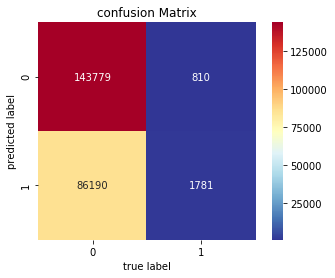

In [159]:
#y_test_np= np.asarray(y_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test_imb,sclf_prd_smote)
tn, fp, fn, tp = confusion_matrix(y_test_imb,sclf_prd_smote).ravel()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap='RdYlBu_r',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label');

print("True positive rate:",(tp/(tp+fn))*100)
print("False positive rate:",(fp/(tn+fp))*100)
print("True negative rate:",(tn/(tn+fp))*100)
print("False negative rate:",(fn/(tp+fn))*100)

# anomoly detection

### Using isolation forest

In [23]:
outliers_fraction = 0.0112

In [24]:
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn import preprocessing

In [25]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X)
data = pd.DataFrame(np_scaled)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
#hyperparamter tuning for isolation forest

In [27]:
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.0112,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [28]:
processed_data['anomalyIF'] = pd.Series(model.predict(data))


C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [29]:
processed_data['anomalyIF'].value_counts()

 1    766515
-1      8683
Name: anomalyIF, dtype: int64

In [30]:
processed_data['anomalyIF'] = processed_data['anomalyIF'].map( {1: 0, -1: 1} )
print(processed_data['anomalyIF'].value_counts())

0    766515
1      8683
Name: anomalyIF, dtype: int64


In [31]:
idx = set(processed_data[processed_data['anomalyIF']==1].index)

In [32]:
true_idx = set(Y[Y==1].index)

In [33]:
len(idx & true_idx)

485

In [34]:
envelope =  EllipticEnvelope(contamination = outliers_fraction) 
envelope.fit(X)
processed_data['anomalyEE'] = envelope.predict(X)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.640139498960897 > -10.215937415258388). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14.031883481082110 > -16.638385236912818). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-18.140929537269344 > -18.632522602403476). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Us

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-22.045838042834966 > -56.163069558412289). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-23.980063605284858 > -57.876517637174366). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-17.152830889793570 > -19.806835734574697). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-23.076326797965628 > -23.369108089497075). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.200930022657012 > -88.547192146771991). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.960328838128127 > -83.675498871934806). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14.255787630430957 > -15.961360483874344). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.406830411360632 > -17.758567106361230). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-10.944615653887769 > -13.596781795972909). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-36.044961551433992 > -64.558733384174531). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-37.236859597029515 > -58.346675728148035). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-64.558733384174531 > -93.676860267968607). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-21.804865384596333 > -50.452464370268991). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-23.560901518066181 > -43.904884230380667). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-21.637810191928619 > -21.784841528113496). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.744797481148581 > -57.428614600926856). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-35.355700435467348 > -66.115182344038303). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-23.797324416942580 > -94.097244693206747). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.314554912976831 > -86.037350842942033). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.631931587510962 > -84.528291458110331). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.452138639192320 > -84.472248373886487). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.012491159365219 > -85.385075285086657). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.230438251355167 > -92.411784159959566). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.209603521208429 > -92.867950369260370). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-59.421611846471230 > -89.862129574339008). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-60.225412977769466 > -89.789376601744664). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.247147840007941 > -87.425731592958414). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.588217769887528 > -84.800541667722456). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-59.622276415886056 > -60.383547934385753). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.267565756213941 > -88.838284359091659). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.294798628650206 > -83.385733137543099). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.532431667160637 > -89.438239507289438). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-59.269434355080065 > -84.677389026514817). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-57.198382026251970 > -87.509992716000639). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.331243832283441 > -85.111450870642443). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.622810827720791 > -58.690148431272540). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\U

In [35]:
processed_data['anomalyEE'] = processed_data['anomalyEE'].map( {1: 0, -1: 1} )

In [36]:
processed_data['anomalyEE'].value_counts()

0    766515
1      8683
Name: anomalyEE, dtype: int64

In [37]:
anmly1_set = set(processed_data[processed_data['anomalyEE']==1].index)

In [38]:
anml25 = set(processed_data[processed_data['anomalyIF']==1].index)

In [39]:
true_idx = set(Y[Y==1].index)

In [40]:
len(anmly1_set & true_idx)

40

In [41]:
len(anmly1_set & anml25)

117

In [42]:
len(anmly1_set & anml25 & true_idx)

2

In [47]:
X_train_am, X_test_am, y_train_am, y_test_am = train_test_split(processed_data, Y, test_size=0.3, random_state=42)

In [48]:
scal = MinMaxScaler()
X_train_am = scal.fit_transform(X_train_am)
X_test_am = scal.transform(X_test_am)

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [49]:
from sklearn.naive_bayes import BernoulliNB
optimal_nb_sm = BernoulliNB()
lp = optimal_nb_sm.fit(X_train_am, y_train_am)

nb_prd_am = optimal_nb_sm.predict(X_test_am)

acc = accuracy_score(y_test_am, nb_prd_am) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_am,nb_prd_am))


The accuracy of the Logistic Regression is {} 96.92853457172342
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    229969
           1       0.11      0.25      0.15      2591

   micro avg       0.97      0.97      0.97    232560
   macro avg       0.55      0.61      0.57    232560
weighted avg       0.98      0.97      0.98    232560



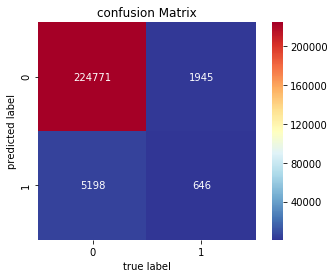

In [55]:
#y_test_np= np.asarray(y_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test_am,nb_prd_am)
tn, fp, fn, tp = confusion_matrix(y_test_am,nb_prd_am).ravel()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap='RdYlBu_r',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [51]:
print("True positive rate:",(tp/(tp+fn))*100)
print("False positive rate:",(fp/(tn+fp))*100)
print("True negative rate:",(tn/(tn+fp))*100)
print("False negative rate:",(fn/(tp+fn))*100)

True positive rate: 24.93245851022771
False positive rate: 2.260304649757141
True negative rate: 97.73969535024285
False negative rate: 75.0675414897723


In [52]:
optimal_lr_sm = LogisticRegression(class_weight='balanced')
lp = optimal_lr_sm.fit(X_train_am, y_train_am)

log_prd_am = optimal_lr_sm.predict(X_test_am)

acc = accuracy_score(y_test_am, log_prd_am) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_am,log_prd_am))

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



The accuracy of the Logistic Regression is {} 86.30589955280358
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    229969
           1       0.06      0.72      0.10      2591

   micro avg       0.86      0.86      0.86    232560
   macro avg       0.53      0.79      0.52    232560
weighted avg       0.99      0.86      0.92    232560



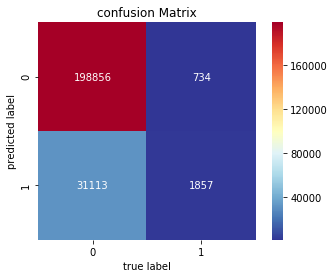

In [53]:
#y_test_np= np.asarray(y_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test_am,log_prd_am)
tn, fp, fn, tp = confusion_matrix(y_test_am,log_prd_am).ravel()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap='RdYlBu_r',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("confusion Matrix")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [54]:
print("True positive rate:",(tp/(tp+fn))*100)
print("False positive rate:",(fp/(tn+fp))*100)
print("True negative rate:",(tn/(tn+fp))*100)
print("False negative rate:",(fn/(tp+fn))*100)

True positive rate: 71.67116943265148
False positive rate: 13.529214807213148
True negative rate: 86.47078519278686
False negative rate: 28.32883056734851


In [75]:

from sklearn.model_selection import RandomizedSearchCV

In [73]:
tuned_parameters_rscv = {'C': [10**-4, 10**-2,10**-1, 10**0, 10**1,10**2,10**3]}

In [77]:
model = RandomizedSearchCV(LogisticRegression(), tuned_parameters_rscv, scoring = 'f1', cv=5)
model.fit(X_train_am, y_train_am)

print(model.best_estimator_)
print(model.score(X_test_am, y_test_am))

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.03255484784147204


In [79]:
optimal_lr_sm = LogisticRegression(C=1000,class_weight='balanced')
lp = optimal_lr_sm.fit(X_train_am, y_train_am)

log_prd_am = optimal_lr_sm.predict(X_test_am)

acc = accuracy_score(y_test_am, log_prd_am) * 100
print('\nThe accuracy of the Logistic Regression is {}' , acc)

print("Classification Report")
print(classification_report(y_test_am,log_prd_am))

C:\Users\JAYESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



The accuracy of the Logistic Regression is {} 85.58694530443756
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    229969
           1       0.06      0.75      0.10      2591

   micro avg       0.86      0.86      0.86    232560
   macro avg       0.53      0.80      0.51    232560
weighted avg       0.99      0.86      0.91    232560



# k-MEANS

In [43]:
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.metrics.pairwise import pairwise_distances

In [44]:
kmeanModel = MiniBatchKMeans(n_clusters=10,batch_size=10000,random_state=42)
kmeanModel.fit(processed_data)

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [60]:
cost = []
K = range(20,40)
for k in K:
    print(k)
    kmeanModel = MiniBatchKMeans(n_clusters=k,batch_size=10000,random_state=42)
    kmeanModel.fit(X)
    cost.append(sum(np.min(pairwise_distances(X=X, Y=kmeanModel.cluster_centers_, metric='euclidean'), axis=1))/X.shape[0])


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


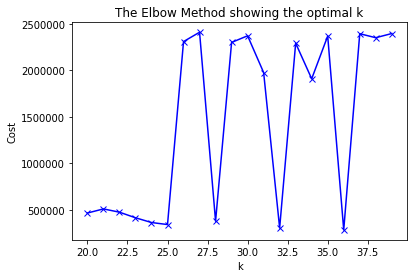

In [61]:
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [136]:
processed_data.drop(columns='cluster',inplace=True)



In [137]:
kmeans_mini_batch = MiniBatchKMeans(n_clusters=25, batch_size=20000,random_state=0).fit(processed_data)

In [138]:
processed_data['cluster']=kmeans_mini_batch.predict(X)

In [139]:
processed_data.iloc[Y[Y==1].index]['cluster'].value_counts()

0    8590
4      27
5       3
2       3
1       1
Name: cluster, dtype: int64

In [140]:
processed_data['cluster'].value_counts()

0    767148
4      5159
2      1549
5       740
1       318
6       184
3        80
7        20
Name: cluster, dtype: int64

In [67]:
kmeans_mini_batch.cluster_centers_.shape

(25, 28)

In [100]:
len(dictlist[0][1])

730676

In [101]:
X.shape

(775198, 29)

In [ ]:
mydic

In [68]:
mydict = {i: np.where(kmeans_mini_batch.labels_ == i)[0] for i in range(kmeans_mini_batch.n_clusters)}

In [69]:
dictlist = []
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [91]:
X['cluster']=""

In [117]:
true_index = set(Y[Y==1].index)